In [1]:
!pip uninstall opencv-python

In [2]:
!pip uninstall opencv-contrib-python

Found existing installation: opencv-contrib-python 4.1.2.30
Uninstalling opencv-contrib-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/opencv_contrib_python-4.1.2.30.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-contrib-python-4.1.2.30


In [3]:
!pip install opencv-python==4.4.0.44
!pip install opencv-contrib-python==4.4.0.44

  Using cached opencv_python-4.4.0.44-cp37-cp37m-manylinux2014_x86_64.whl (49.5 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 55.7 MB 26.2 MB/s 


In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

In [5]:
import imutils

In [6]:
posters = cv2.imread("/posters.jpeg")
poster = cv2.imread("/poster.jpg")

posters_img = cv2.cvtColor(posters, cv2.COLOR_BGR2RGB)
poster_img = cv2.cvtColor(poster, cv2.COLOR_BGR2RGB)
poster_img_rot = imutils.rotate(poster_img, angle=180)

gray_posters = cv2.cvtColor(posters_img, cv2.COLOR_RGB2GRAY)
gray_poster = cv2.cvtColor(poster_img, cv2.COLOR_RGB2GRAY)

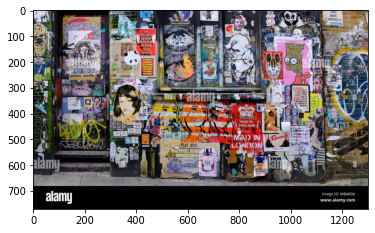

In [7]:
plt.imshow(posters_img)

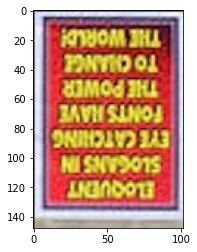

In [8]:
plt.imshow(poster_img_rot)

In [9]:
sift = cv2.SIFT_create()
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
k1, des1 = sift.detectAndCompute(posters_img, None)
k2, des2 = sift.detectAndCompute(poster_img_rot, None)

In [10]:
def bf_cv2_matcher(k1, d1, img1, k2, d2, img2):
  matches = bf.match(d1, d2)
  best_matches = sorted(matches, key = lambda x: x.distance)[:10]
  match_img = cv2.drawMatches(img1, k1, img2, k2, best_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
  return match_img

def matcher_custom(k1, d1, img1, k2, d2, img2):
  matches = []
  for i in range(len(d1)):
    for j in range(len(d2)):
        matches.append(cv2.DMatch(_distance=np.linalg.norm(d1[i] - d2[j]), _imgIdx=0, _queryIdx=i, _trainIdx=j))

  matches = sorted(matches, key=lambda x: x.distance)[:10]

  match_img = cv2.drawMatches(img1, k1, img2, k2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
  return match_img


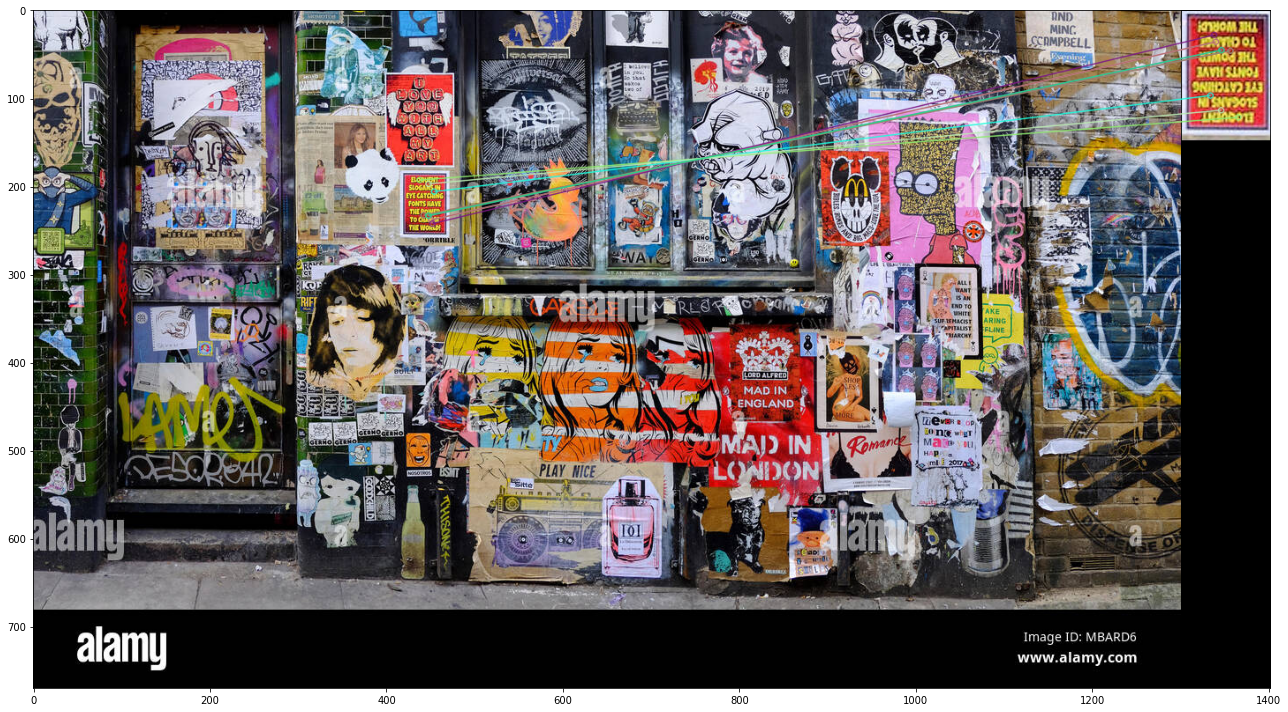

In [11]:
fig, ax = plt.subplots(figsize=(18, 10))
ax.imshow(bf_cv2_matcher(k1, des1, posters_img, k2, des2, poster_img_rot), aspect='auto')
plt.tight_layout()

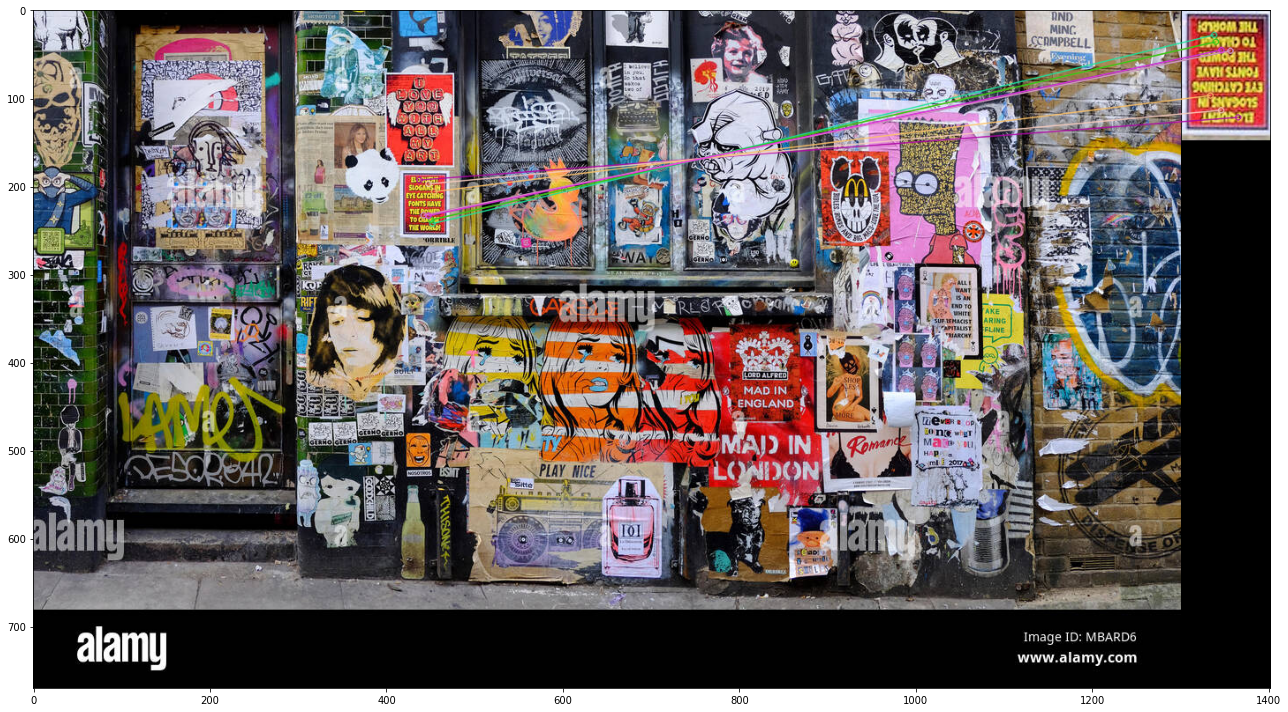

In [12]:
fig, ax = plt.subplots(figsize=(18, 10))
im = matcher_custom(k1,  des1, posters_img, k2, des2, poster_img_rot)
ax.imshow(im, aspect='auto')
plt.tight_layout()

In [13]:
k1, des1 = sift.detectAndCompute(gray_posters, None)
k2, des2 = sift.detectAndCompute(gray_poster, None)

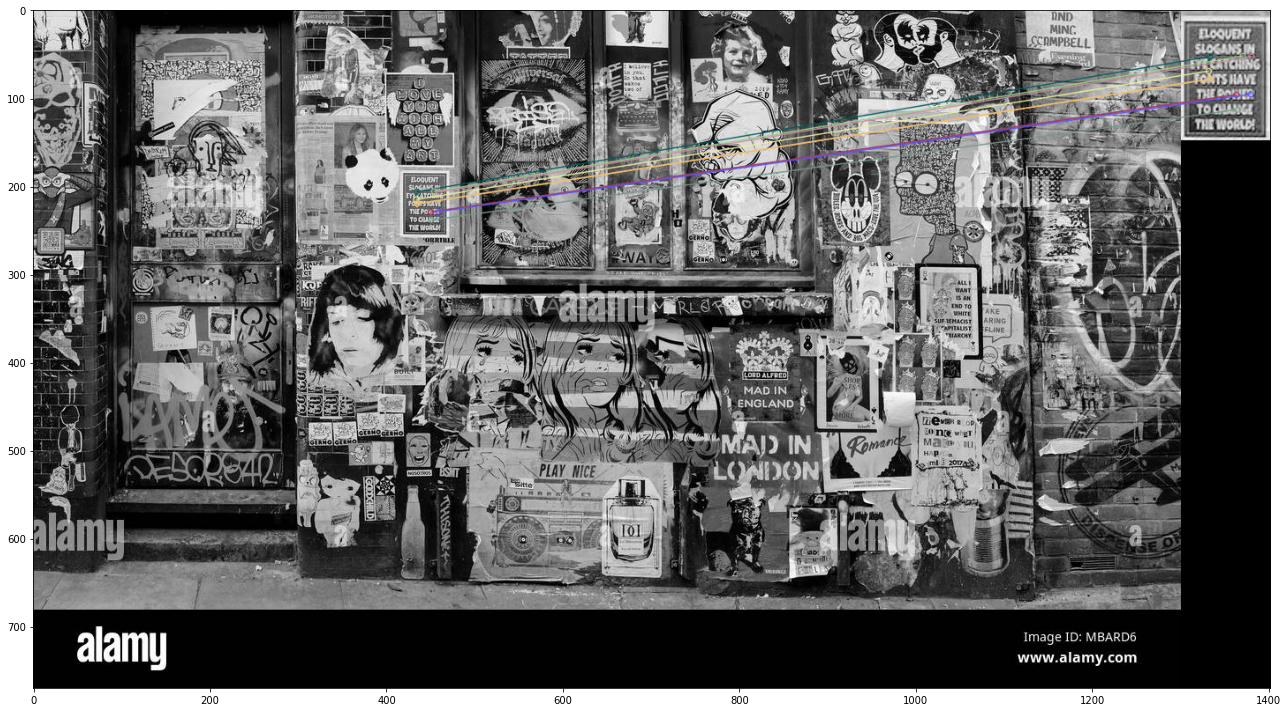

In [14]:
fig, ax = plt.subplots(figsize=(18, 10))
ax.imshow(bf_cv2_matcher(k1, des1, gray_posters, k2, des2, gray_poster), aspect='auto')
plt.tight_layout()

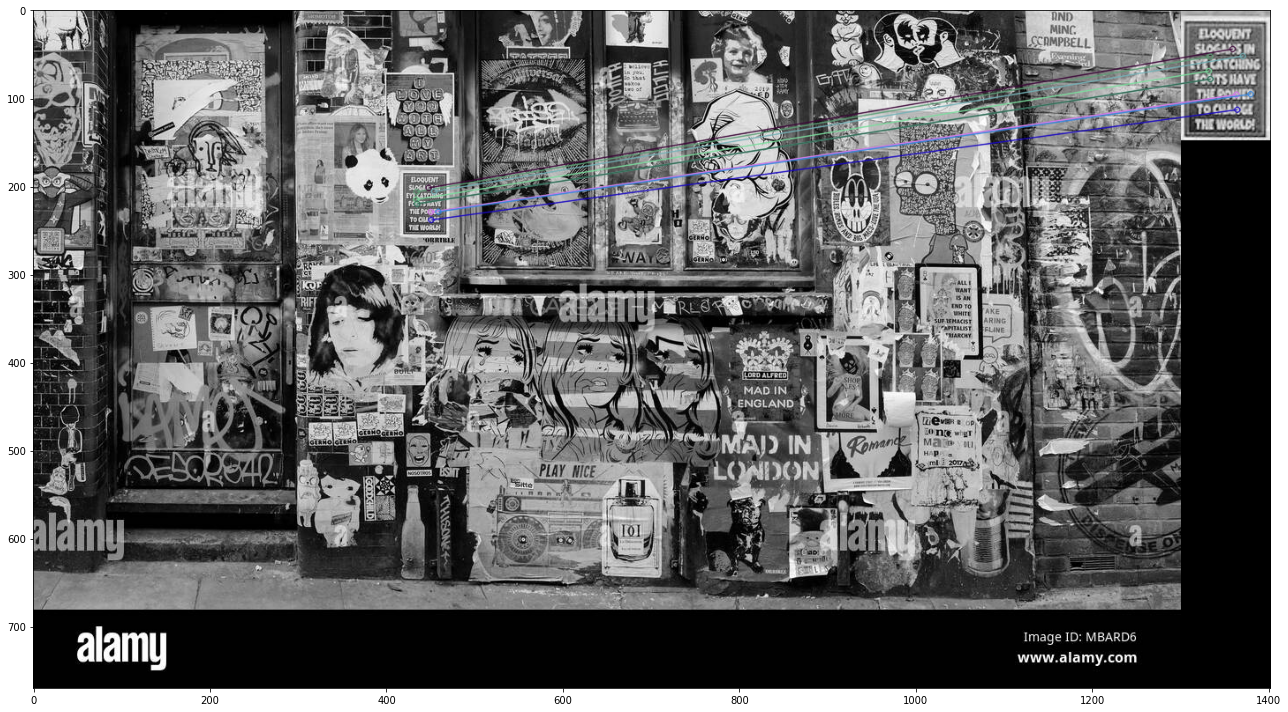

In [15]:
fig, ax = plt.subplots(figsize=(18, 10))
im = matcher_custom(k1,  des1, gray_posters, k2, des2, gray_poster)
ax.imshow(im, aspect='auto')
plt.tight_layout()